In [3]:
from perceptron import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from data_generator import DataGenerator

In [4]:
N = 20
nd = 200
nmax = 100

alpha_range = np.arange(0.75, 3.0001, 0.25)
clamp_range = np.arange(0.2, 1.0001, 0.1)
results = []

generator = DataGenerator(N)

for clamp in clamp_range:
    
    print(f"Doing {clamp = }")
    clamp = ((1.0 - clamp) * 0.5, (1.0 + clamp) * 0.5)
    
    success_runs = np.zeros(len(alpha_range))

    for i, alpha in enumerate(alpha_range):
        P = int(alpha * N)

        success_sum = 0
        for _ in range(nd):
            perceptron = Perceptron(N)
            X, Y = generator.generate(P, clamp=clamp)
            if perceptron.train(X, Y, nmax):
                success_sum += 1

        success_runs[i] = float(success_sum) / float(nd)
    
    results.append(success_runs)

Doing clamp = 0.2
Doing clamp = 0.30000000000000004
Doing clamp = 0.4000000000000001
Doing clamp = 0.5000000000000001
Doing clamp = 0.6000000000000001
Doing clamp = 0.7000000000000002
Doing clamp = 0.8000000000000003
Doing clamp = 0.9000000000000001
Doing clamp = 1.0000000000000002


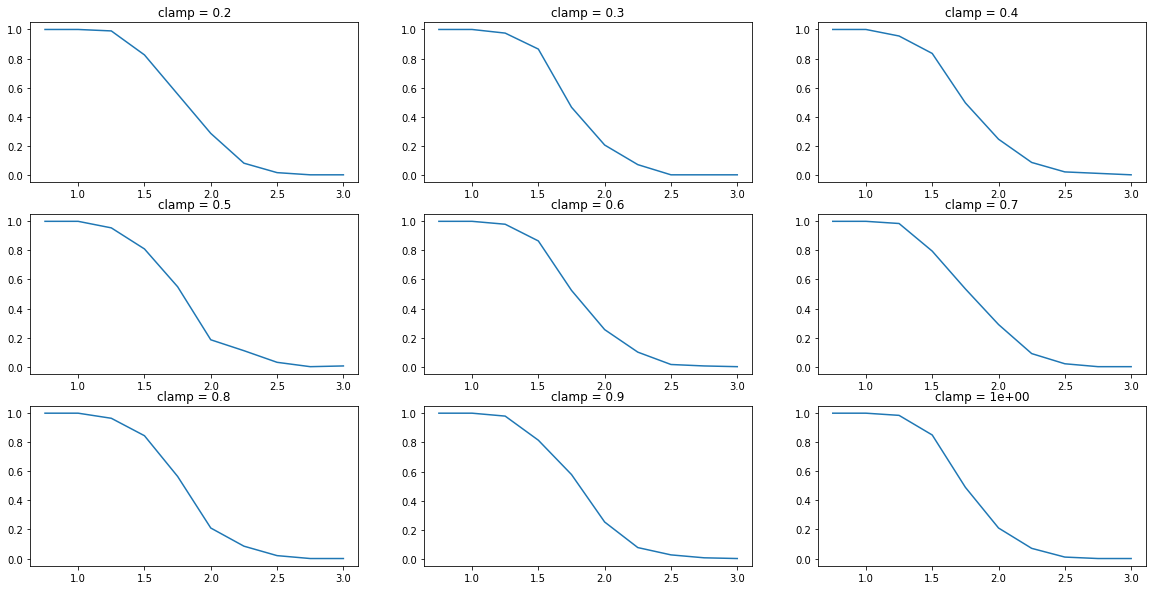

In [12]:
fig, plots = plt.subplots(3, 3, figsize=(20, 10))
plots = list(plots[0]) + list(plots[1]) + list(plots[2])
for i, plot in enumerate(plots):
    plot.plot(alpha_range, results[i])
    plot.set_title(f"clamp = {clamp_range[i]:.1}")

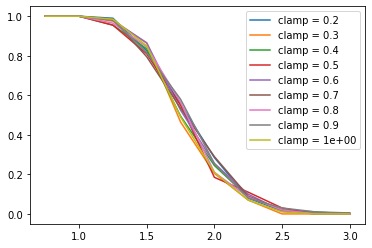

In [14]:
for i, plot in enumerate(plots):
    plt.plot(alpha_range, results[i], label=f"clamp = {round(clamp_range[i], 1)}")
plt.legend()